In [16]:
import numpy as np
import skimage
import skimage.data
import skimage.io
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from matplotlib.patches import Patch



# 1. Read Dataset

In [19]:
base = "dataset"
paths = {
    "label": os.path.join(base, "label_images_semantic"),
    "orig": os.path.join(base, "original_images"),
    "rgb":  os.path.join(base, "RGB_color_image_masks")
}

orig_files = sorted([f for f in os.listdir(paths["orig"]) if f.endswith(".jpg")])
df = pd.read_csv(os.path.join(base, "class_dict_seg.csv"))
color_items = [(row["name"], (int(row["r"]), int(row["g"]), int(row["b"]))) for i, row in df.iterrows()]


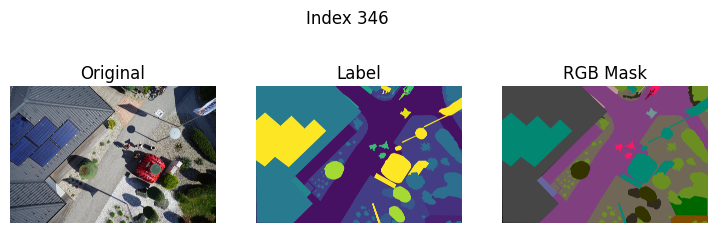

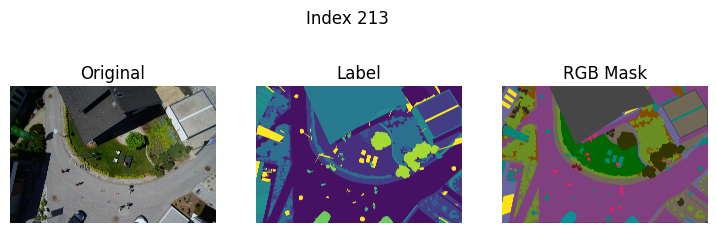

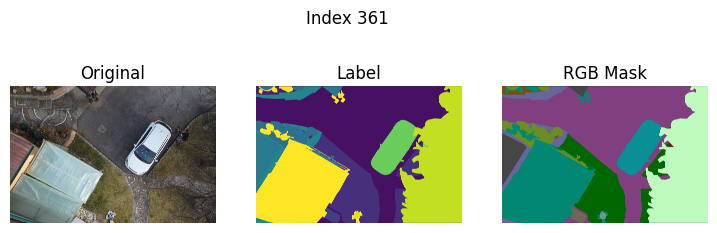

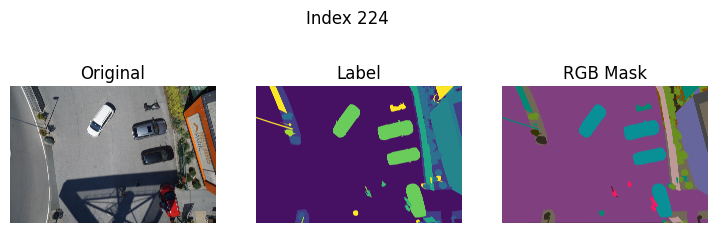

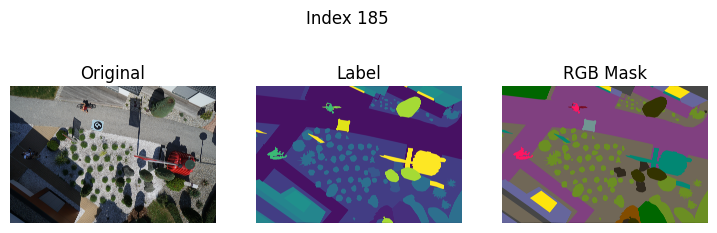

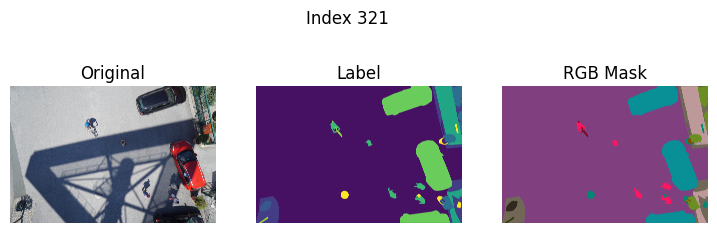

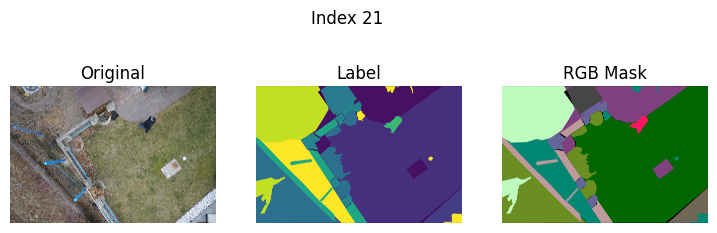

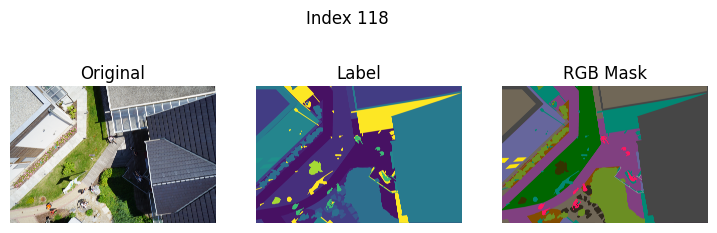

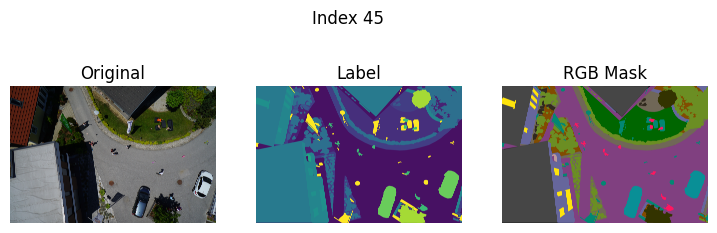

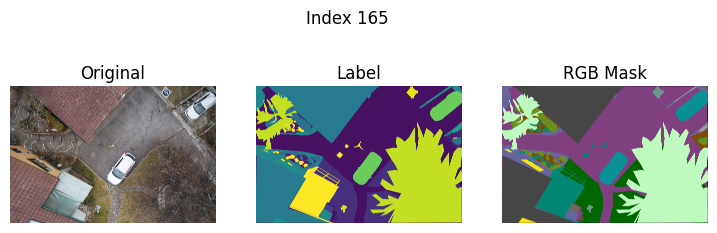

In [12]:
idxs = random.sample(range(len(orig_files)), 10)

for i in idxs:
    
    f_jpg = orig_files[i]
    f_png = os.path.splitext(f_jpg)[0] + ".png"

    img_orig = Image.open(os.path.join(paths["orig"], f_jpg))
    img_label = Image.open(os.path.join(paths["label"], f_png))
    img_rgb = Image.open(os.path.join(paths["rgb"], f_png))

    plt.figure(figsize=(9,3))
    plt.suptitle(f"Index {i}")
    plt.subplot(1,3,1); plt.imshow(img_orig); plt.title("Original"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(img_label); plt.title("Label"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(img_rgb); plt.title("RGB Mask"); plt.axis('off')
    plt.show()


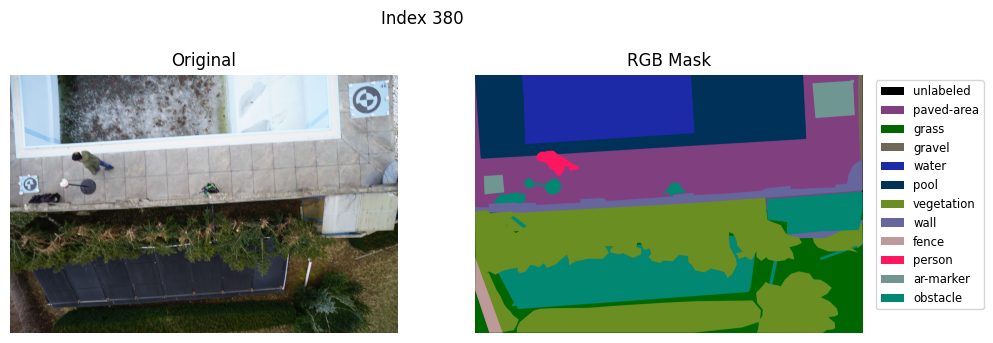

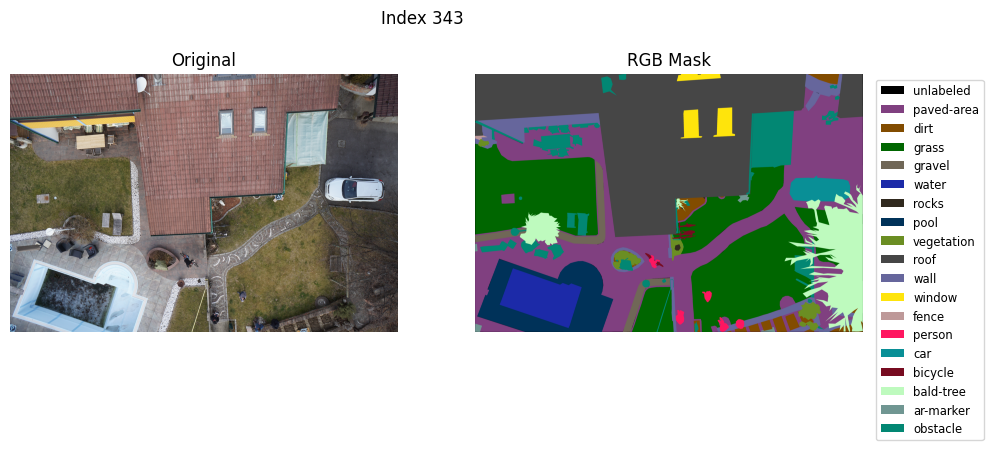

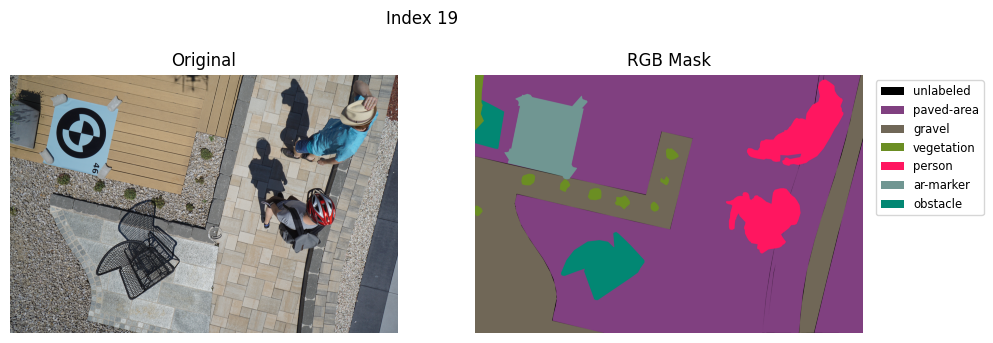

In [21]:
idxs = random.sample(range(len(orig_files)), 3)

for i in idxs:
    f_jpg = orig_files[i]
    f_png = os.path.splitext(f_jpg)[0] + ".png"

    img_orig = Image.open(os.path.join(paths["orig"], f_jpg))
    img_rgb = Image.open(os.path.join(paths["rgb"], f_png))
    arr = np.array(img_rgb).reshape(-1,3)
    unique_colors = {tuple(c) for c in arr}

    present = [(name,(r,g,b)) for name,(r,g,b) in color_items if (r,g,b) in unique_colors]

    plt.figure(figsize=(11,4))
    plt.suptitle(f"Index {i}")
    plt.subplot(1,2,1); plt.imshow(img_orig); plt.title("Original"); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img_rgb); plt.title("RGB Mask"); plt.axis('off')

    handles = [Patch(facecolor=(r/255,g/255,b/255), label=name) for name,(r,g,b) in present]
    plt.legend(handles=handles, bbox_to_anchor=(1.02,1), loc='upper left', fontsize='small')
    plt.show()